In [1]:
%run '../rootlib.ipynb'
chain = R.TChain( "bbq" )
chain.Add( "bbq.root" )

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


1

In [2]:
c1 = Canvas( width=1000, height=600)

In [11]:
def adcE( tube ):
    return "adcEast[" + str(tube) + "]"
def tdcE( tube ):
    return "tdcEast[" + str(tube) + "]"
def safeE( tubes ):
    ss = ""
    for tube in tubes :
        ss += tdcE( tube ) + " > 150 && " + adcE( tube ) + " > 10 &&"
    ss += "1"
    return ss
def adcW( tube ):
    return "adcWest[" + str(tube) + "]"
def tdcW( tube ):
    return "tdcWest[" + str(tube) + "]"
def safeW( tubes ):
    ss = ""
    for tube in tubes :
        ss += tdcW( tube ) + " > 150 && " + adcW( tube ) + " > 10 &&"
    ss += "1"
    return ss
R.gStyle.SetOptFit( 111 )

def rget( name ) :
    return R.gDirectory.Get( name )

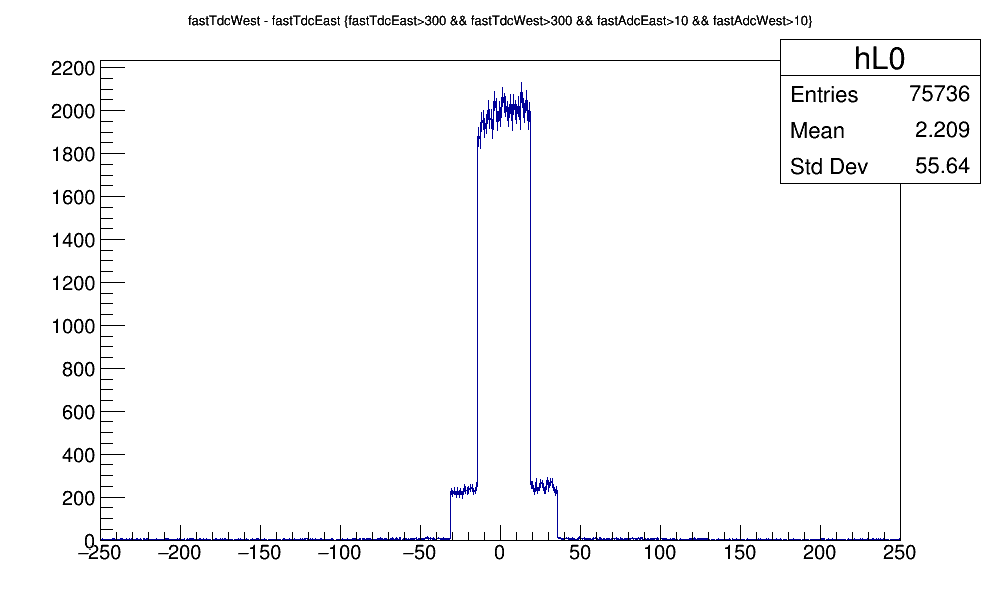

In [7]:
chain.Draw( "fastTdcWest - fastTdcEast>>hL0( 500, -250, 250 )", "fastTdcEast>300 && fastTdcWest>300 && fastAdcEast>10 && fastAdcWest>10", "h" )
c1

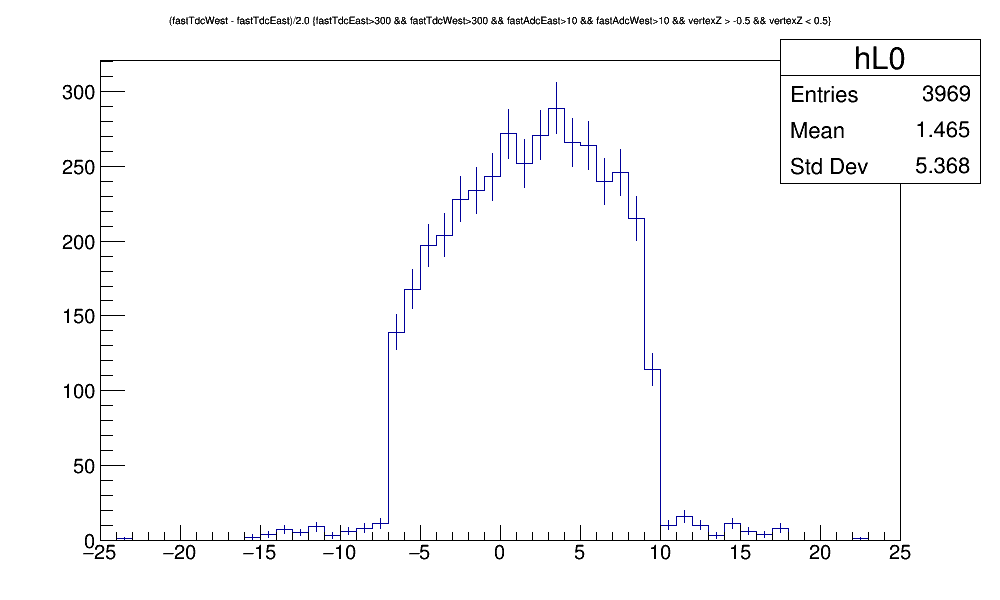

In [10]:
chain.Draw( "(fastTdcWest - fastTdcEast)/2.0>>hL0( 50, -25, 25 )", "fastTdcEast>300 && fastTdcWest>300 && fastAdcEast>10 && fastAdcWest>10 && vertexZ > -0.5 && vertexZ < 0.5", "h" )
c1

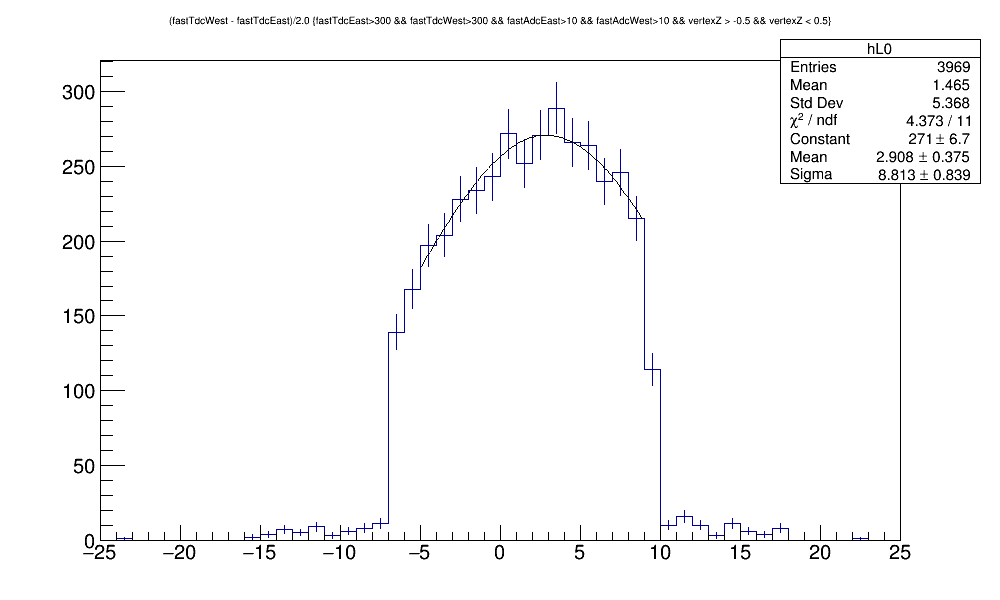

In [16]:
hL0 = rget( "hL0" )
ff = R.TF1( "fgaus", "gaus", -5, 9 )
hL0.Fit( ff, "RQ" )
c1

In [17]:
8.8 * 0.56

4.928000000000001